### Part 6. Model Selection
##### (a) Data Loading and Splitting

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("X_final.csv")
y = pd.read_csv("y_final.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 233)

#### (b) Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
param_gbc = {"learning_rate": [1, 0.1, 0.01], "n_estimators": [100, 200, 300], "max_depth": [1, 2, 3, 4, 5]}
gbc = GridSearchCV(GradientBoostingClassifier(), param_gbc, refit = True, verbose = 0, n_jobs = 12)
gbc.fit(X_train, y_train)
print(gbc.best_params_)
print(gbc.best_estimator_)
y_pred = gbc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

#### (c) Multilayer Perceptron

d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (128, 128), 'learning_rate': 'adaptive', 'solver': 'adam'}
MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(128, 128),
              learning_rate='adaptive')
Accuracy score:  0.7171848013816926
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       949
           1       0.56      0.77      0.65      1542
           2       0.85      1.00      0.92      2141

    accuracy                           0.72      4632
   macro avg       0.47      0.59      0.52      4632
weighted avg       0.58      0.72      0.64      4632



d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


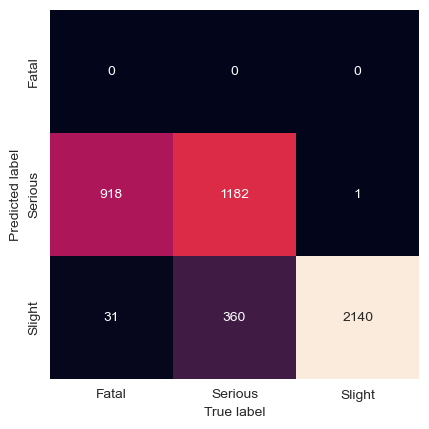

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
param_mlp = {"hidden_layer_sizes": [(128, 128), (128, 128, 128),(128, 128, 128, 128), (128, 128, 128, 128, 128)], "activation": ["relu", "logistic"], "solver": ["adam"], "alpha": [0.001, 0.01, 0.05, 0.1], "learning_rate": ["constant", "adaptive"]}
mlp = GridSearchCV(MLPClassifier(), param_mlp, refit = True, verbose = 0, n_jobs = 12)
mlp.fit(X_train, y_train)
print(mlp.best_params_)
print(mlp.best_estimator_)
y_pred = mlp.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True label")
plt.ylabel("Predicted label");

### Part 7. Model Evaluation

In [ ]:
models = pd.DataFrame({
    "Model": ["Gradient Boosting", "Multilayer Perceptron"],
    "Accuracy": [accuracy_score(y_test, gbc.predict(X_test)), accuracy_score(y_test, mlp.predict(X_test))]})
models.sort_values(by = "Accuracy", ascending = False)

In [ ]:
ax = sns.barplot(x = "Model", y = "Accuracy", data = models.sort_values(by = "Accuracy", ascending = False))
for acc in ax.containers:
    ax.bar_label(acc, label_type = "center");